In [126]:
import numpy as np
import pandas as pd

In [127]:
df = pd.read_csv('athlete_events.csv')
df_region = pd.read_csv('noc_regions.csv')


In [128]:
df.shape

(271116, 15)

In [129]:
df = df[df['Season'] == 'Summer']

In [130]:
df.shape

(222552, 15)

In [131]:
df = df.merge(df_region, on='NOC', how='left')

In [132]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [133]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [134]:
df.duplicated().sum()

np.int64(1385)

In [135]:
df.drop_duplicates(inplace=True)

In [136]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [137]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [138]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9030
Height     50500
Weight     52506
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     187090
region       370
notes     216770
dtype: int64

In [139]:
df['Medal'].value_counts()

Medal
Gold      11456
Bronze    11409
Silver    11212
Name: count, dtype: int64

In [140]:
df = pd.concat([df, pd.get_dummies(df['Medal']).astype(int)], axis=1)

In [141]:
df.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [142]:
df.shape

(221167, 20)

In [143]:
medal_tally = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'Sport', 'Event', 'Medal'])

In [144]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()

In [145]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze
50,IND,9,7,12


In [146]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [147]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [148]:
years = df['Year'].unique().tolist()
years.sort()
years.insert(0, 'Overall')

years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [149]:
df['region'].unique().tolist()

['China',
 'Denmark',
 'Netherlands',
 'Finland',
 'Norway',
 'Romania',
 'Estonia',
 'France',
 'Morocco',
 'Spain',
 'Egypt',
 'Iran',
 'Bulgaria',
 'Italy',
 'Chad',
 'Azerbaijan',
 'Sudan',
 'Russia',
 'Argentina',
 'Cuba',
 'Belarus',
 'Greece',
 'Cameroon',
 'Turkey',
 'Chile',
 'Mexico',
 'USA',
 'Nicaragua',
 'Hungary',
 'Nigeria',
 'Algeria',
 'Kuwait',
 'Bahrain',
 'Pakistan',
 'Iraq',
 'Syria',
 'Lebanon',
 'Qatar',
 'Malaysia',
 'Germany',
 'Canada',
 'Ireland',
 'Australia',
 'South Africa',
 'Eritrea',
 'Tanzania',
 'Jordan',
 'Tunisia',
 'Libya',
 'Belgium',
 'Djibouti',
 'Palestine',
 'Comoros',
 'Kazakhstan',
 'Brunei',
 'India',
 'Saudi Arabia',
 'Maldives',
 'Ethiopia',
 'United Arab Emirates',
 'Yemen',
 'Indonesia',
 'Philippines',
 nan,
 'Uzbekistan',
 'Kyrgyzstan',
 'Tajikistan',
 'Japan',
 'Republic of Congo',
 'Switzerland',
 'Brazil',
 'Monaco',
 'Israel',
 'Uruguay',
 'Sweden',
 'Sri Lanka',
 'Armenia',
 'Ivory Coast',
 'Kenya',
 'Benin',
 'UK',
 'Ghana',
 'S

In [150]:
country = df['region'].unique().tolist()
df.shape

(221167, 20)

In [151]:
df = df.dropna(subset=['region'])

In [152]:
country = np.unique(df['region'].dropna().values).tolist()

In [153]:
df.shape

(220797, 20)

In [154]:
country.sort()

In [155]:
country.insert(0, 'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [156]:
medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
# medal_df[medal_df['region'] == 'Nepal']
# medal_df
# medal_df[medal_df['Year'] == 2016]
medal_df[(medal_df['Year'] == 2016) & (medal_df['region'] == 'Nepal')]


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
17799,11203,Saraswati Bhattarai,F,22.0,163.0,46.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Women's 1,500 metres",NaN,Nepal,NaN,0,0,0
72239,44032,Sirish Gurung,M,17.0,158.0,65.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,NaN,Nepal,NaN,0,0,0
96485,59230,Phupu Lamu Khatri,F,19.0,163.0,63.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Judo,Judo Women's Half-Middleweight,NaN,Nepal,NaN,0,0,0
136076,82971,Jit Bahadur Muktan,M,36.0,168.0,64.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Archery,Archery Men's Individual,NaN,Nepal,NaN,0,0,0
162683,99238,Nisha Rawal,F,20.0,172.0,73.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Heavyweight,NaN,Nepal,NaN,0,0,0
165223,100876,Hari Kumar Rimal,M,29.0,166.0,59.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 5,000 metres",NaN,Nepal,NaN,0,0,0
181575,111044,Gaurika Singh,F,13.0,155.0,45.0,Nepal,NEP,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 100 metres Backstroke,NaN,Nepal,NaN,0,0,0


In [157]:
def fetch_medal_tally(df,year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == year) & (medal_df['region'] == country)]
    
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold',ascending=False).reset_index()
    
    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)


In [158]:
fetch_medal_tally(df,year=2016, country='Overall')

                      region  Gold  Silver  Bronze  total
0                        USA    46      37      38    121
1                         UK    27      23      17     67
2                      China    26      18      26     70
3                     Russia    19      17      20     56
4                    Germany    17      10      15     42
..                       ...   ...     ...     ...    ...
198  Virgin Islands, British     0       0       0      0
199       Virgin Islands, US     0       0       0      0
200                    Yemen     0       0       0      0
201                   Zambia     0       0       0      0
202                 Zimbabwe     0       0       0      0

[203 rows x 5 columns]


In [159]:
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0


In [160]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [161]:
df['Name'].unique().shape

(115938,)

In [162]:
df['region'].nunique()

205

In [163]:
df['Sport'].unique().shape

(52,)

In [164]:
df['Year'].unique().shape[0] - 1

28

In [165]:
df['City'].unique().shape

(23,)

In [166]:
df[['Year', 'region']].shape

(220797, 2)

In [167]:
df.shape

(220797, 20)

In [168]:
nations_over_time = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index().sort_values('Year')

In [169]:
nations_over_time = nations_over_time.rename(columns={'Year': 'Editions','count': 'No. of Countries'})

In [170]:
import plotly.express as px
import matplotlib.pyplot as plt

In [171]:
# plt.figure(figsize=(10,8))
fig = px.line(nations_over_time, x='Editions', y='No. of Countries')
fig.show()

In [172]:
events_over_time = df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index().sort_values('Year')
events_over_time.rename(columns={'Year': 'Editions', 'count': 'No of Events'}, inplace=True)
events_over_time

,Editions,No of Events
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [173]:
fig = px.line(events_over_time, x='Editions', y='No of Events')
fig.show()

In [174]:
temp_df.head()

,Name,region,Sport,Gold,Silver,Bronze
0,A Dijiang,China,Basketball,0,0,0
1,A Lamusi,China,Judo,0,0,0
2,Gunnar Nielsen Aaby,Denmark,Football,0,0,0
3,Edgar Lindenau Aabye,Denmark,Tug-Of-War,1,0,0
4,"Cornelia ""Cor"" Aalten (-Strannood)",Netherlands,Athletics,0,0,0


In [175]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [176]:
df['Name'].head(20)


0                              A Dijiang
1                               A Lamusi
2                    Gunnar Nielsen Aaby
3                   Edgar Lindenau Aabye
4     Cornelia "Cor" Aalten (-Strannood)
5     Cornelia "Cor" Aalten (-Strannood)
6         Einar Ferdinand "Einari" Aalto
7                      Jyri Tapani Aalto
8                     Minna Maarit Aalto
9                     Minna Maarit Aalto
10                  Arvo Ossian Aaltonen
11                  Arvo Ossian Aaltonen
12                  Arvo Ossian Aaltonen
13                  Arvo Ossian Aaltonen
14                  Arvo Ossian Aaltonen
15               Paavo Johannes Aaltonen
16               Paavo Johannes Aaltonen
17               Paavo Johannes Aaltonen
18               Paavo Johannes Aaltonen
19               Paavo Johannes Aaltonen
Name: Name, dtype: object

In [177]:
temp_df = df.dropna(subset=['Medal'])
x = temp_df['Name'].value_counts().reset_index().head(15)
# x.rename(columns={'Name_x': 'Name'}, inplace=True)
x

,Name,count
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Borys Anfiyanovych Shakhlin,13
4,Takashi Ono,13
5,Edoardo Mangiarotti,13
6,Sawao Kato,12
7,Birgit Fischer-Schmidt,12
8,Paavo Johannes Nurmi,12
9,Aleksey Yuryevich Nemov,12


In [238]:
def most_sucessful(df, sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport]

        temp_df['Name'].value_counts().reset_index().head(15).merge(df, on = 'Name', how='left')[['Name', 'region', 'Medal']]
       
most_sucessful(df, 'badminton')
# df

In [180]:
medal_count = (
    df.groupby('Name')['Medal'].count()
    .reset_index(name='total_medals')
)
info = df[['Name', 'region', 'Sport']].drop_duplicates(subset=['Name'])
medal = medal_tally['Total']
result = info.join(medal, how='right')
result
# medal_count.sort_values(by='GOld', ascending=False)
info.shape

(115938, 3)

In [181]:
temp_df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes',
       'Bronze', 'Gold', 'Silver'],
      dtype='object')

In [182]:
df[['Gold','Silver','Bronze']] = df[['Gold','Silver','Bronze']].astype('int')

temp_df = df[['Name', 'region', 'Sport', 'Gold','Silver', 'Bronze']].copy()

# temp_df.iloc[:, 'total'] = temp_df[['Gold','Silver', 'Bronze']].sum(axis=1)

temp_df.iloc[:, 'total'] = temp_df[['Gold', 'Silver', 'Bronze']].sum(axis=1)
result = temp_df.groupby('Name').agg({
        'region': 'first',
        'Sport': 'first',
        'Gold': 'sum',
        'Silver': 'sum',
        'Bronze': 'sum',
        'total': 'sum'
}).reset_index()

result = result.sort_values(by='total', ascending=False).reset_index()

result.head(15)

C:\Users\acer\AppData\Local\Temp\ipykernel_2920\641972909.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Must have equal len keys and value when setting with an iterable

In [239]:
# def successful(df, sport):
# 1. Convert medal columns to integers
df[['Gold','Silver','Bronze']] = df[['Gold','Silver','Bronze']].astype(int)

# 2. Copy required columns
temp_df = df[['Name', 'region', 'Sport', 'Gold','Silver','Bronze']].copy()

# 3. Compute total medals
temp_df.loc[:, 'total'] = temp_df[['Gold','Silver','Bronze']].sum(axis=1)

# 4. Group by athlete and sum medals
result = temp_df.groupby('Name').agg({
    
    'Sport': 'first',
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'total': 'sum'
}).reset_index()

# 5. Sort by total descending
result = result.sort_values(by='total', ascending=False)

# 6. Show top 15
result.head(15)


C:\Users\acer\AppData\Local\Temp\ipykernel_2920\4209640302.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Sport,Gold,Silver,Bronze,total
74913,"Michael Fred Phelps, II",Swimming,23,3,2,28
63198,Larysa Semenivna Latynina (Diriy-),Gymnastics,9,5,4,18
80993,Nikolay Yefimovich Andrianov,Gymnastics,7,5,3,15
102393,Takashi Ono,Gymnastics,5,4,4,13
25470,Edoardo Mangiarotti,Fencing,6,5,2,13
13945,Borys Anfiyanovych Shakhlin,Gymnastics,7,4,2,13
49974,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,8,3,1,12
94978,Ryan Steven Lochte,Swimming,6,3,3,12
79230,Natalie Anne Coughlin (-Hall),Swimming,3,4,5,12
21482,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,4,4,4,12


In [240]:
def top_10_athletes_by_country(df, country):
    temp = df.dropna(subset=['Medal']).copy()

    temp.drop_duplicates(
        subset=['Name', 'Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True
    )

    temp = temp[temp['region'] == country]

    if temp.empty:
        return pd.DataFrame()
    
    medal_count = (
        temp.groupby(['Name']).agg(
            Gold = ('Gold', 'sum'),
            Silver = ('Silver', 'sum'),
            Bronze = ('Bronze', 'sum'),
            Total = ('Medal', 'count')
        ).sort_values('Total', ascending=False).head(10).reset_index()
                      
    )

    return medal_count

In [242]:
top_10_athletes_by_country(df, 'India')

,Name,Gold,Silver,Bronze,Total
0,Udham Singh Kular,3,1,0,4
1,Leslie Walter Claudius,3,1,0,4
2,"Victor John ""V. J."" Peter",1,1,1,3
3,Dhyan Chand Bais,3,0,0,3
4,Ranganathan Francis,3,0,0,3
5,Shankar Pillay Laxman,2,1,0,3
6,Harbinder Singh Chimni,1,0,2,3
7,Randhir Singh Gentle,3,0,0,3
8,Prithipal Singh,1,1,1,3
9,Richard James Allen,3,0,0,3


In [ ]:

def medals(df, sport):

    df = df.dropna(subset=['Medal'])
    # 1. Convert medal columns to integers
    df[['Gold','Silver','Bronze']] = df[['Gold','Silver','Bronze']].astype(int)

    # 2. Copy required columns
    # df[['Gold', 'Silver', 'Bronze']] = df[['Gold', 'Silver', 'Bronze']].astype(int)

    if sport != 'Overall':
        df = df[df['Sport'] == sport]

    df['total'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1)

    # 4. Group by athlete and sum medals
    result = df.groupby('Name').agg({
    'region': 'first',
    'Sport': 'first',
    'Gold': 'sum',
    'Silver': 'sum',
    'Bronze': 'sum',
    'total': 'sum'
    }).reset_index()

    # 5. Sort by total descending   
    result = result.sort_values(by='total', ascending=False).reset_index(drop=True)
                                                                         
    return result


medals(df, sport='Swimming').head()

C:\Users\acer\AppData\Local\Temp\ipykernel_2920\696926168.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,region,Sport,Gold,Silver,Bronze,total
0,"Michael Fred Phelps, II",USA,Swimming,23,3,2,28
1,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",USA,Swimming,8,3,1,12
2,Natalie Anne Coughlin (-Hall),USA,Swimming,3,4,5,12
3,"Dara Grace Torres (-Hoffman, -Minas)",USA,Swimming,4,4,4,12
4,Ryan Steven Lochte,USA,Swimming,6,3,3,12


In [ ]:
# country wise analysis
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_2920\1739904453.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
new_df = temp_df[temp_df['region'] == 'USA']
# new_df.groupby('Year').count()['Medal'].reset_index()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\acer\AppData\Local\Temp\ipykernel_2920\1219300359.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Year', ylabel='Sport'>

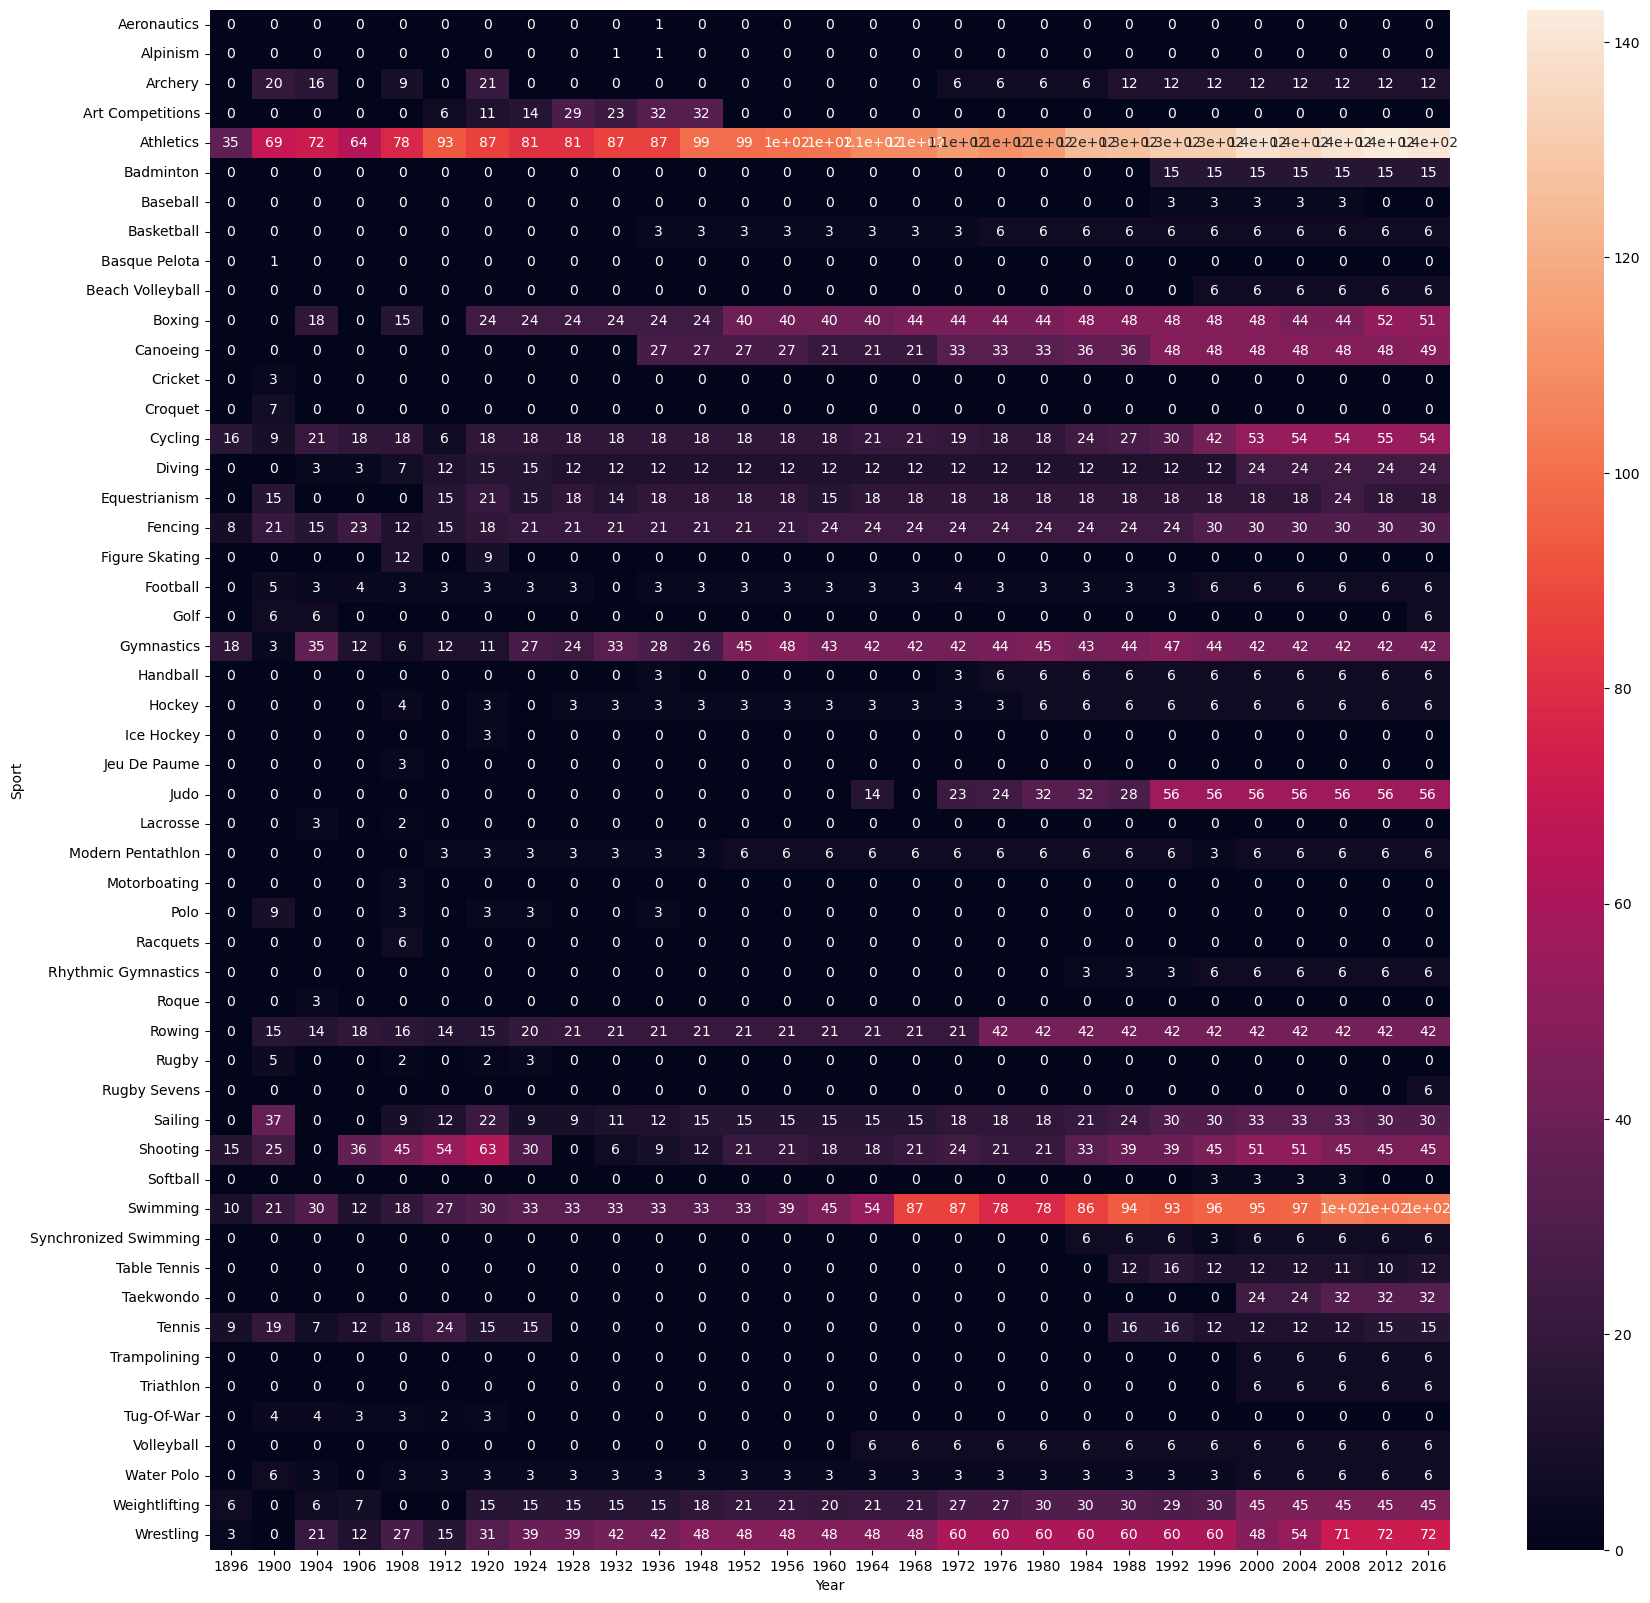

In [206]:
df_new = df.copy()
new = df_new.dropna(subset=['Medal'])

new.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)
new[new['region'] == 'India']
plt.figure(figsize=(20,20))
sns.heatmap(new.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0), annot=True)

In [273]:
new_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
124,84,Stephen Anthony Abas,M,26.0,165.0,55.0,United States,USA,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,USA,NaN,0,0,1
214,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN,0,1,0
217,153,Monica Cecilia Abbott,F,23.0,191.0,88.0,United States,USA,2008 Summer,2008,Summer,Beijing,Softball,Softball Women's Softball,Silver,USA,NaN,0,0,1
242,165,Nia Nicole Abdallah,F,20.0,175.0,56.0,United States,USA,2004 Summer,2004,Summer,Athina,Taekwondo,Taekwondo Women's Featherweight,Silver,USA,NaN,0,0,1
540,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,USA,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221697,135045,Rbert Zimonyi,M,46.0,170.0,52.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN,0,1,0
221769,135103,"Albert Conrad ""Al"" Zirkel",M,19.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Wrestling,"Wrestling Men's Lightweight, Freestyle",Bronze,USA,NaN,1,0,0
221868,135165,"Kimberley Lyn ""Kim"" Zmeskal (-Burdette)",F,16.0,139.0,36.0,United States,USA,1992 Summer,1992,Summer,Barcelona,Gymnastics,Gymnastics Women's Team All-Around,Bronze,USA,NaN,1,0,0
221899,135184,"Jacqueline Jean ""Jackie"" Zoch",F,27.0,180.0,76.0,United States,USA,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Women's Coxed Eights,Bronze,USA,NaN,1,0,0


In [234]:
temp_df = df.dropna(subset=['Medal'])
a = temp_df['Name'].value_counts().reset_index().head(10).merge(df, on='Name', how='left')[['Name', 'Sport']]
temp_df[['Gold', 'Silver', 'Bronze']] = temp_df[['Gold', 'Silver', 'Bronze']].astype(int)
temp_df['total'] = temp_df[['Gold', 'Silver', 'Bronze']].sum(axis=1)
temp_df.sample(5)

C:\Users\acer\AppData\Local\Temp\ipykernel_2920\3186999908.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\acer\AppData\Local\Temp\ipykernel_2920\3186999908.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver,total
210045,128074,Mirosaw Andrzej Waligra,M,22.0,173.0,69.0,Poland,POL,1992 Summer,1992,...,Barcelona,Football,Football Men's Football,Silver,Poland,NaN,0,0,1,1
88974,54472,Jeon Byeong-Gwan,M,18.0,155.0,56.0,South Korea,KOR,1988 Summer,1988,...,Seoul,Weightlifting,Weightlifting Men's Flyweight,Silver,South Korea,NaN,0,0,1,1
179436,109662,Kyle Keith Shewfelt,M,22.0,164.0,61.0,Canada,CAN,2004 Summer,2004,...,Athina,Gymnastics,Gymnastics Men's Floor Exercise,Gold,Canada,NaN,0,1,0,1
118697,72602,Gnter Lyhs,M,30.0,160.0,65.0,Germany,GER,1964 Summer,1964,...,Tokyo,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Germany,NaN,1,0,0,1
64718,39413,Jn Geleta,M,21.0,171.0,69.0,Czechoslovakia,TCH,1964 Summer,1964,...,Tokyo,Football,Football Men's Football,Silver,Czech Republic,NaN,0,0,1,1


In [255]:
import plotly.figure_factory as ff

In [259]:
athelete_df  = df.drop_duplicates(subset=['Name', 'region'])
x1 = athelete_df['Age'].dropna()
x2 = athelete_df[athelete_df['Medal'] == 'Gold']['Age'].dropna()

x3 = athelete_df[athelete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athelete_df[athelete_df['Medal'] == 'Bronze']['Age'].dropna()

fig = ff.create_distplot([x1, x2, x3, x4], ['Overall Age', 'Gold Medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.update_layout(autosize=False, width=1000, height=600)


In [263]:
x = []
name = []
famous_sport = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

for sport in famous_sport:
    temp_df = athelete_df[athelete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
    name.append(sport)
    # print(sport)

fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.show()

In [269]:
df.sample(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
43749,26734,Arturo De Vecchi,M,30.0,170.0,NaN,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Men's Sabre, Individual",NaN,Italy,NaN,0,0,0
25665,15896,Rosalyn Evette Bryant (-Clark),F,20.0,165.0,57.0,United States,USA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Women's 400 metres,NaN,USA,NaN,0,0,0
65574,39936,Michel Ghaoui,M,NaN,NaN,NaN,Lebanon,LIB,1948 Summer,1948,Summer,London,Boxing,Boxing Men's Featherweight,NaN,Lebanon,NaN,0,0,0
1234,807,"Benjamin Willard ""Ben"" Adams",M,22.0,188.0,78.0,United States,USA,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Standing Long Jump,Bronze,USA,NaN,1,0,0
182848,111815,Sergey Skrypnik,M,23.0,188.0,82.0,Kazakhstan,KAZ,1996 Summer,1996,Summer,Atlanta,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,Kazakhstan,NaN,0,0,0
182959,111880,Winarni Binti Slamet,F,24.0,155.0,51.0,Indonesia,INA,2000 Summer,2000,Summer,Sydney,Weightlifting,Weightlifting Women's Featherweight,Bronze,Indonesia,NaN,1,0,0
139180,84905,Franois N'Doumb Lea,M,30.0,NaN,NaN,Cameroon,CMR,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,NaN,Cameroon,NaN,0,0,0
29976,18449,George Carpenter,M,43.0,182.0,82.0,Ireland,IRL,1952 Summer,1952,Summer,Helsinki,Fencing,"Fencing Men's epee, Individual",NaN,Ireland,NaN,0,0,0
52503,32075,Abdel Ghani El-Mansouri,M,NaN,176.0,72.0,Morocco,MAR,1964 Summer,1964,Summer,Tokyo,Football,Football Men's Football,NaN,Morocco,NaN,0,0,0
118210,72293,ke Lundeberg,M,23.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,Shooting Men's Trap,NaN,Sweden,NaN,0,0,0


In [278]:
def weight_v_height(df, sport): 
    athelete_df = df.drop_duplicates(subset=['Name', 'region'])
    athelete_df['Medal'].fillna('No Medal', inplace=True)

    if sport != 'Overall':
        temp_df = athelete_df[athelete_df['Sport'] == sport]
        return temp_df
    else:
        return athelete_df

weight_v_height(df, 'Badminton')


C:\Users\acer\AppData\Local\Temp\ipykernel_2920\3395687410.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal,Finland,NaN,0,0,0
665,433,Pablo Abin Vicen,M,23.0,177.0,68.0,Spain,ESP,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Men's Singles,No Medal,Spain,NaN,0,0,0
1338,867,"Christopher Thomas ""Chris"" Adcock",M,23.0,183.0,80.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Badminton,Badminton Mixed Doubles,No Medal,UK,NaN,0,0,0
1341,869,"Gabrielle Marie ""Gabby"" Adcock (White-)",F,25.0,167.0,NaN,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,No Medal,UK,NaN,0,0,0
2053,1314,Juliette Chantal Ah-Wan,F,27.0,155.0,57.0,Seychelles,SEY,2008 Summer,2008,Summer,Beijing,Badminton,Badminton Mixed Doubles,No Medal,Seychelles,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221154,134723,Zheng Bo,M,20.0,178.0,80.0,China-1,CHN,2004 Summer,2004,Summer,Athina,Badminton,Badminton Men's Doubles,No Medal,China,NaN,0,0,0
221297,134802,Zhou Mi,F,25.0,175.0,65.0,China,CHN,2004 Summer,2004,Summer,Athina,Badminton,Badminton Women's Singles,Bronze,China,NaN,1,0,0
221607,134990,Misha Zilberman,M,23.0,171.0,61.0,Israel,ISR,2012 Summer,2012,Summer,London,Badminton,Badminton Men's Singles,No Medal,Israel,NaN,0,0,0
222423,135484,Nikolay Vladimirovich Zuyev,M,29.0,180.0,83.0,Russia,RUS,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Mixed Doubles,No Medal,Russia,NaN,0,0,0


In [290]:
athelete_df = df.drop_duplicates(subset=['Name', 'region'])

men = athelete_df[athelete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women = athelete_df[athelete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

final = men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x': 'Male', 'Name_y': 'Female'}, inplace=True)
final.fillna(0, inplace=True)
final.astype(int)

,Year,Male,Female
0,1896,174,0
1,1900,1181,23
2,1904,629,6
3,1906,759,6
4,1908,1772,44
5,1912,1976,53
6,1920,2280,73
7,1924,2535,132
8,1928,2342,285
9,1932,1382,162
